**Elemento de pórtico - 2D**

In [130]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math as m
import matplotlib.cm as cm

In [131]:
x = sp.Symbol('x')

In [132]:
numero_de_nos = 88
numero_de_elementos = 178

nos_de_interpolacao = 5

dist = 0.5

dimensao = 2 # não alterar
dimensao_global = 2 # não alterar
graus_de_liberdade_por_nó = 3 # naõ alterar

força_nos = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 0 se não há força aplicada, 1 se há

forca_nos_2D = [[0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.],
               [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.],
               [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0,0], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0,0], [0., 0.], [0., 0.], [0., 0.], [0., 0.],
               [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0,0], [0,0], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0,0], [0., 0.], [0., 0.], [0., 0.],
               [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0,0], [0,0], [0,0], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0,0],
               [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.]] # [direção X, direção Y]

momentos_nos = [ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # 0 se não há momento aplicado, 1 se há

momentos_nos_2D = [[0], [0], [0], [0], [20000], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],
                   [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],
                   [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],
                   [0], [0], [0], [10000]] # [direção Z]

condicoes_de_contorno_moveis = sp.Matrix([[0, 0, 0], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [0,0,0], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                                          [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.]]) # 0 para fixo, 1 para móvel

matriz_de_compatibilidade = [[1,2],[1,3],[2,3],[2,4],[3,4],[3,5],[4,5],[4,6],[5,6],[5,7],[6,7],[6,8],[7,8],[8,9],[7,9],[8,10],[9,10],[10,12],[9,11],[11,12],
                             [12,13],[11,13],[11,14],[13,14],[13,15],[14,15],[14,16],[15,16],[15,17],[16,17],[16,18],[17,18],[17,19],[18,19],[18,20],[19,20],
                             [8,21],[8,22],[21,22],[21,23],[22,23],[22,24],[23,24],[23,25],[24,25],[24,26],[25,26],[25,27],[26,27],[27,28],[26,28],[28,30],
                             [26,29],[29,30],[30,31],[29,31],[31,32],[29,32],[29,33],[32,33],[32,34],[33,34],[33,35],[34,35],[34,36],[35,36],[13,35],[13,36],
                             [37,38],[38,39],[27,39],[31,40],[40,41],[41,42],[37,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[42,50],[38,43],
                             [39,43],[39,44],[27,44],[27,45],[28,45],[28,46],[30,47],[30,48],[31,48],[31,49],[40,49],[40,50],[41,50],[45,51],[51,52],[46,52],
                             [47,53],[46,51],[52,53],[53,54],[47,54],[48,54],[55,56],[56,57],[51,57],[54,58],[58,59],[59,60],[55,61],[61,62],[62,63],[63,64],
                             [64,65],[65,66],[66,67],[67,68],[60,68],[56,61],[57,61],[57,62],[51,62],[51,63],[52,63],[52,64],[53,65],[53,66],[54,66],[54,67],
                             [58,67],[58,68],[59,68],[63,69],[69,70],[64,69],[64,70],[70,71],[65,71],[71,72],[65,72],[66,72],[73,74],[74,75],[69,75],[72,76],
                             [76,77],[77,78],[73,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[78,86],[74,79],[75,79],[75,80],[69,80],[69,81],
                             [70,81],[70,82],[71,83],[71,84],[72,84],[72,85],[76,85],[76,86],[77,86],[81,87],[87,88],[84,88],[82,87],[83,88]] 

matriz_de_coordenadas = [[0,0],[0.2,1],[0.5,1],[0.3919,2],[1,2],[0.5878,3],[1.5,3],[0.7838,4],[2,3.5],[2,4],[2.8,3.5],[2.8,4],[4.0162,4],[3.3,3],[4.2122,3],
                         [3.8,2],[4.4081,2],[4.3,1],[4.6,1],[4.8,0],[0.9797,4.9048],[1.2797,4.9048],[1.1654,5.8837],[1.7654,5.8837],[1.3716,6.8643],[2.2716,6.8643],
                         [1.5676,7.845],[2.2716,7.845],[2.5284,6.8643],[2.5284,7.845],[3.2324,7.845],[3.4284,6.8643],[3.0346,5.8837],[3.6346,5.8837],[3.5203,4.9048],
                         [3.8203,4.9048],[0.3676,7.845],[0.7676,7.845],[1.1676,7.845],[3.6324,7.845],[4.0324,7.845],[4.4324,7.845],[0.7676,8.23],[1.1676,8.615],
                         [1.5676,9],[2.2716,9],[2.5284,9],[3.2324,9],[3.6324,8.615],[4.0324,8.23],[1.5676,10],[2.2716,10],[2.5284,10],[3.2324,10],[0.3676,10],
                         [0.7676,10],[1.1676,10],[3.6324,10],[4.0324,10],[4.4324,10],[0.7676,10.385],[1.1676,10.77], [1.5676,11.155],[2.2716,11.155],[2.5284,11.155],
                         [3.2324,11.155],[3.6324,10.77],[4.0324,10.385],[1.5676,12.155],[2.2716,12.155],[2.5284,12.155],[3.2324,12.155],[0.3676,12.155],[0.7676,12.155],
                         [1.1676,12.155],[3.6324,12.155],[4.0324,12.155],[4.4324,12.155],[0.7676,12.54],[1.1676,12.925], [1.5676,13.31],[2.2716,13.31],[2.5284,13.31],
                         [3.2324,13.31],[3.6324,12.925],[4.0324,12.54],[2.2716,14.31],[2.5284,14.31]] 

ρ = [2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850,
     2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850,
     2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850,
     2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850,
     2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850,
     2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850,
     2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850, 2850] # massa específica do elemento

g = 9.80665 # módulo da gravidade local

W = sp.Matrix([[0] * numero_de_elementos, [0] * numero_de_elementos]) # carga distribuída no sistema de coordenadas do elemento

E = [70e9] * numero_de_elementos

A = [95e-3] * numero_de_elementos 

I = [14.3292e-8] * numero_de_elementos

Fator_de_escala = 100 # apenas para visualização dos deslocamentos

In [133]:
def plot_reta_continua(ponto1, ponto2, args):
    x = [ponto1[0], ponto2[0]]
    y = [ponto1[1], ponto2[1]]
    
    plt.plot(x, y, marker='o', c=args[0])

def plot_reta_tracejada(ponto1, ponto2):
    x = [ponto1[0], ponto2[0]]
    y = [ponto1[1], ponto2[1]]
    
    plt.plot(x, y, '--', marker = 'o', c='#C1BEBF')

def plot_reta_continua_tensoes(ponto1, ponto2, c):
    plt.plot([ponto1[0], ponto2[0]], [ponto1[1], ponto2[1]], color=c)

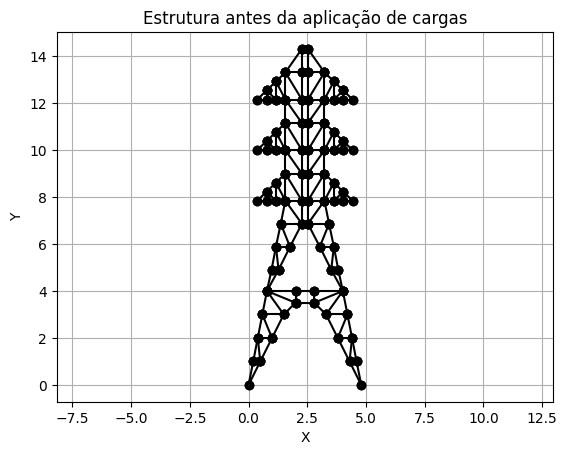

In [134]:
c = [(0,0,0)]
for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j= matriz_de_compatibilidade[k][1]
    plot_reta_continua(matriz_de_coordenadas[i-1], matriz_de_coordenadas[j-1], c)

plt.title('Estrutura antes da aplicação de cargas')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid()
plt.show() 

In [135]:
for i in range(numero_de_elementos):
    φ = (np.array([sp.symbols(f"φ{i}") for i in range(1, numero_de_elementos+1)]))

seno, cosseno, L = [], [], []
for i in range(numero_de_elementos):
    j, k = matriz_de_compatibilidade[i][0]-1, matriz_de_compatibilidade[i][1]-1
    L.append(np.sqrt((matriz_de_coordenadas[j][0]-matriz_de_coordenadas[k][0])**2 + (matriz_de_coordenadas[j][1]-matriz_de_coordenadas[k][1])**2))
    seno.append(-(matriz_de_coordenadas[j][1]-matriz_de_coordenadas[k][1])/L[i])
    cosseno.append(-(matriz_de_coordenadas[j][0]-matriz_de_coordenadas[k][0])/L[i])

for k in range(numero_de_elementos):
    φ[k] = m.atan2(seno[k],cosseno[k])

def K_barra(E,A,L):
    return(E*A/L)

def K_viga(E,I,L):
    return(E*I/(L**3))

In [136]:
carga_vertical, peso_distribuido, centroide_carga_vertical, centroide_peso = [], [], [], []
for i in range(numero_de_elementos):
    carga_vertical.append(sp.integrate(W[0,i], (x, 0, L[i])))
    peso_distribuido.append(sp.integrate(ρ[i]*A[i]*g, (x, 0, L[i])))
    centroide_carga_vertical.append(sp.integrate(W[0,i]*x, (x, 0, L[i]))/sp.integrate(W[0,i], (x, 0, L[i])))
    centroide_peso.append(sp.integrate(ρ[i]*A[i]*g*x, (x, 0, L[i]))/sp.integrate(ρ[i]*A[i]*g, (x, 0, L[i])))

R1v, R1p, R2v, R2p = sp.symbols('R1v R1p R2v R2p')
R1v_vec, R1_peso_vec, R2v_vec, R2_peso_vec = [], [], [], []

if np.all(W == 0):
    carga_valor = False
else:
    carga_valor = True

if carga_valor == True:
    for k in range(numero_de_elementos):
        if W[0,k] != 0:
            equilibrio_vertical = sp.Eq(R1v + R2v, carga_vertical[k])
            equilibrio_momento = sp.Eq(-R1v*L[k]+carga_vertical[k]*(L[k]-centroide_carga_vertical[k]), 0)
            solucao = sp.solve([equilibrio_vertical, equilibrio_momento], (R1v, R2v))
            R1v_vec.append(solucao[R1v])
            R2v_vec.append(solucao[R2v])
        else:
            R1v_vec.append(0)
            R2v_vec.append(0)

elif carga_valor == False:
    R1v_vec = np.zeros(numero_de_elementos)
    R2v_vec = np.zeros(numero_de_elementos)

if g != 0:
    for k in range(numero_de_elementos):
        equilibrio_vertical_peso = sp.Eq(R1p + R2p, peso_distribuido[k])
        equilibrio_momento_peso = sp.Eq(-R1p*L[k]+peso_distribuido[k]*(L[k]-centroide_peso[k]), 0)
        solucao_peso = sp.solve([equilibrio_vertical_peso, equilibrio_momento_peso], (R1p, R2p))
        R1_peso_vec.append(solucao_peso[R1p])
        R2_peso_vec.append(solucao_peso[R2p])

elif g == 0:
    R1_peso_vec = np.zeros(numero_de_elementos)
    R2_peso_vec = np.zeros(numero_de_elementos)

In [137]:
Fx_sistema_global, Fy_sistema_global = np.zeros(numero_de_nos), np.zeros(numero_de_nos)
Fx_sistema_calculo_1, Fx_sistema_calculo_2, Fy_sistema_calculo_1, Fy_sistema_calculo_2 = [], [], [], []

for i in range(numero_de_elementos):
    Fx_sistema_calculo_1.append(-R1v_vec[i]*seno[i]+(L[i]*float(W[1,i])/2))
    Fx_sistema_calculo_2.append(-R2v_vec[i]*seno[i]+(L[i]*float(W[1,i])/2))
    Fy_sistema_calculo_1.append(R1v_vec[i]*cosseno[i]-R1_peso_vec[i])
    Fy_sistema_calculo_2.append(R2v_vec[i]*cosseno[i]-R2_peso_vec[i])

for i in range(numero_de_elementos):
    k = matriz_de_compatibilidade[i][0]
    Fx_sistema_global[k-1] += Fx_sistema_calculo_1[i]
    Fy_sistema_global[k-1] += Fy_sistema_calculo_1[i]

for i in range(numero_de_elementos):
    k = matriz_de_compatibilidade[i][1]
    Fx_sistema_global[k-1] += Fx_sistema_calculo_2[i]
    Fy_sistema_global[k-1] += Fy_sistema_calculo_2[i]
    

In [138]:
vetores_de_força, vetores_de_deslocamento_editavel_1 = [],[]
vetores_de_deslocamento, vetor_de_rigidez_barra, vetor_de_rigidez_viga = [],[],[]

for i in range(1, numero_de_elementos+1):
    vetor_de_rigidez_barra.append(K_barra(E[i-1],A[i-1],L[i-1]))
    vetor_de_rigidez_viga.append(K_viga(E[i-1],I[i-1],L[i-1]))    

for _ in range(numero_de_elementos):

    forças = ''.join((i + str(j)) for i, j in zip('f' * (numero_de_nos), range(1, numero_de_nos+1)))
    momentos = ''.join((i + str(j)) for i, j in zip('M' * (numero_de_nos), range(1, numero_de_nos+1)))
    rotacoes = ''.join((i + str(j)) for i, j in zip('θ' * (numero_de_nos), range(1, numero_de_nos+1)))
    deslocamentos = ''.join((i + str(j)) for i, j in zip('u' * (numero_de_nos), range(1, numero_de_nos+1)))

    u = np.array([sp.symbols(f"u{i}") for i in range(1, numero_de_nos+1)])
    d = np.array([sp.symbols(f"d{i}") for i in range(1, numero_de_nos+1)])
    θ = (np.array([sp.symbols(f"θ{i}") for i in range(1, numero_de_nos+1)]))

    vetores_de_deslocamento_editavel_1.append(d)
    vetores_de_deslocamento.append(u)

f = (np.array([sp.symbols(f"f{i}") for i in range(1, numero_de_nos+1)]))
M = (np.array([sp.symbols(f"M{i}") for i in range(1, numero_de_nos+1)]))

for k in range(len(força_nos)):
    if força_nos[k] != 0:
        f[k] = força_nos[k]

for k in range(len(momentos_nos)):
    if momentos_nos[k] != 0:
        M[k] = momentos_nos[k] 

vetores_de_força, vetores_de_momento = f, M

for i, j in zip(range(0,numero_de_elementos), range(0,numero_de_elementos)):
    for k in range(0,2):
        vetores_de_deslocamento_editavel_1[i][k] = condicoes_de_contorno_moveis[matriz_de_compatibilidade[j][k]-1]

for i in range(0, numero_de_elementos):
    for k in range(1,numero_de_nos+1):
        if k != matriz_de_compatibilidade[i][0] and k != matriz_de_compatibilidade[i][1]: 
            vetores_de_deslocamento[i][k-1] = 0

In [139]:
vetor_de_deslocamento_finais = []
matriz_total_local = []
soma = sp.zeros(1,numero_de_nos)

for j in range(numero_de_nos):
    for k in range(numero_de_elementos):
        if vetores_de_deslocamento[k][j] != 0:
            soma[j] = vetores_de_deslocamento[k][j]
            break

for i in range(numero_de_nos):
    vetor_de_deslocamento_finais.append(soma[i]*condicoes_de_contorno_moveis[i]) 

matrizes_de_rigidez, matrizes_de_rigidez_simbolicas = np.zeros([2*graus_de_liberdade_por_nó, 2*graus_de_liberdade_por_nó]), [] 

for i in range(1,numero_de_elementos+1):
    matriz_de_rigidez_local_barra =  np.array([[1, 0, 0, -1, 0, 0],[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [-1, 0, 0, 1, 0, 0],
                                               [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])*vetor_de_rigidez_barra[i-1]
    matriz_de_rigidez_local_viga =  np.array([[0, 0, 0, 0, 0, 0], [0, 12, 6*L[i-1], 0, -12, 6*L[i-1]],[0, 6*L[i-1], 4*(L[i-1])**2,
                                               0, -6*L[i-1], 2*(L[i-1])**2], [0, 0, 0, 0, 0, 0], [0, -12, -6*L[i-1], 0, 12,
                                              -6*L[i-1]], [0, 6*L[i-1], 2*(L[i-1])**2, 0, -6*L[i-1], 4*(L[i-1])**2]])*vetor_de_rigidez_viga[i-1]
    matriz_total_local.append(matriz_de_rigidez_local_barra+matriz_de_rigidez_local_viga)

matriz_de_rigidez_global_local = []
for k in range(numero_de_elementos):
    R = [[cosseno[k], seno[k], 0, 0, 0, 0],[-seno[k], cosseno[k], 0, 0, 0, 0],[0, 0, 1, 0, 0, 0],[0, 0, 0, cosseno[k], seno[k],
         0],[0, 0, 0, -seno[k], cosseno[k], 0], [0, 0, 0, 0, 0, 1]]
    
    Matriz_1 = np.matmul(np.transpose(R), matriz_total_local[k])
    matriz_de_rigidez_global_local.append(np.matmul(Matriz_1,R))

matriz_de_rigidez_global_sistema = np.zeros((graus_de_liberdade_por_nó*numero_de_nos, graus_de_liberdade_por_nó*numero_de_nos))
for i in range(numero_de_elementos):
    ln = [matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-3, matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-2,
          matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-1, matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-3,
          matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-2, matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-1]
    for j, p in zip(ln, range(len(matriz_de_rigidez_global_local[i][0]))):
        for k, n in zip(ln, range(len(matriz_de_rigidez_global_local[i][0]))):
            matriz_de_rigidez_global_sistema[j][k] = matriz_de_rigidez_global_sistema[j][k] + matriz_de_rigidez_global_local[i][p][n]


In [140]:
vetor_forca_2D = []
for i in range(numero_de_nos):
    for j in range(dimensao_global):
        vetor_forca_2D.append(forca_nos_2D[i][j])
    vetor_forca_2D.append(momentos_nos_2D[i][0])

for i in range(numero_de_nos):
    vetor_forca_2D[i*graus_de_liberdade_por_nó] += Fx_sistema_global[i]
    vetor_forca_2D[i*graus_de_liberdade_por_nó+1] += Fy_sistema_global[i]

vetor_forca_2D = np.array(vetor_forca_2D)

U = []
for i in range(1, numero_de_nos+1):
    U.append(sp.symbols(f"U{i}x"))
    U.append(sp.symbols(f"U{i}y"))
    U.append(sp.symbols(f"θ{i}"))

U_calculo_1, U_calculo_2 = U.copy(), []
no_fixo_movel = []

for k in range(numero_de_nos):
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,0])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,1])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,2])

for j in range(graus_de_liberdade_por_nó*numero_de_nos):
    U_calculo_2.append(U_calculo_1[j]*no_fixo_movel[j])

contador_final_global = []

for i in range(graus_de_liberdade_por_nó*numero_de_nos):
    if U_calculo_2[i] == 0:
        contador_final_global.append(i)
        
matriz_de_rigidez_global_sistema_reajustada_1 = np.delete(matriz_de_rigidez_global_sistema, contador_final_global, axis=0)
matriz_de_rigidez_global_sistema_reajustada_2 = np.delete(matriz_de_rigidez_global_sistema_reajustada_1, contador_final_global, axis=1)

vetor_forca_2D_calculo  = vetor_forca_2D.copy()
vetor_forca_2D_calculo = np.delete(vetor_forca_2D_calculo, contador_final_global, axis=0)
matriz_de_rigidez_global_sistema_reajustada_2 = matriz_de_rigidez_global_sistema_reajustada_2.astype(float) 
vetor_forca_2D_calculo = vetor_forca_2D_calculo.astype(float)
U_calculo_preliminar = np.linalg.solve(matriz_de_rigidez_global_sistema_reajustada_2,vetor_forca_2D_calculo)

contador_float = np.linspace(0,len(vetor_forca_2D)-1,num=graus_de_liberdade_por_nó*numero_de_nos)
contador_inteiro = [int(elemento) for elemento in contador_float]

contador_inteiro_inicial_set = set(contador_inteiro)
contador_inteiro_final_set = set(contador_final_global)
diferenca = contador_inteiro_inicial_set-contador_inteiro_final_set


In [141]:
for i, k in zip(diferenca, range(len(U_calculo_preliminar))):
        U[i] = U_calculo_preliminar[k]  
for j in contador_final_global:
        U[j] = 0   

Ux, Uy, θ, U_global = [], [], [], []
for i in range(int(len(U)/graus_de_liberdade_por_nó)):
    Ux.append(U[graus_de_liberdade_por_nó*i])
    Uy.append(U[graus_de_liberdade_por_nó*i+1])
    θ.append(U[graus_de_liberdade_por_nó*i+2])
    U_global.append(np.sqrt((U[graus_de_liberdade_por_nó*i])**2 + (U[graus_de_liberdade_por_nó*i+1])**2))

U_final = np.zeros(((numero_de_nos, dimensao_global)))

for k in range(numero_de_nos):
    U_final[k][0] = Ux[k]
    U_final[k][1] = Uy[k]

F = np.matmul(matriz_de_rigidez_global_sistema, U)

matriz_de_coordenadas_finais = matriz_de_coordenadas + U_final

In [142]:
for k in range(numero_de_nos):
    if np.array(condicoes_de_contorno_moveis)[k][0] == 0:
        F[graus_de_liberdade_por_nó*k] = F[graus_de_liberdade_por_nó*k] - Fx_sistema_global[k]
    if np.array(condicoes_de_contorno_moveis)[k][1] == 0:
        F[graus_de_liberdade_por_nó*k+1] = F[graus_de_liberdade_por_nó*k+1] - Fy_sistema_global[k]

F_reacoes = F.copy()

for k in range(numero_de_nos):
    for j in range(dimensao_global):
        if np.array(forca_nos_2D)[k][j] != 0:
            F_reacoes[graus_de_liberdade_por_nó*k+j] = F_reacoes[graus_de_liberdade_por_nó*k+j] - np.array(forca_nos_2D)[k][j]

In [143]:
x_final, y_final = [], []
for i in range(numero_de_nos):
    x_final.append(matriz_de_coordenadas_finais[i][0])
    y_final.append(matriz_de_coordenadas_finais[i][1])

matriz_de_coordenadas_finais_em_escala = matriz_de_coordenadas + U_final*Fator_de_escala

In [144]:
Ux_sistema_local, Uy_sistema_local = [], []
for k in range(numero_de_elementos):
    for i in matriz_de_compatibilidade[k]:
        Ux_sistema_local.append(Ux[i-1]*cosseno[k]-Uy[i-1]*seno[k])
        Uy_sistema_local.append(Ux[i-1]*seno[k]+Uy[i-1]*cosseno[k])

In [145]:
for i in range(numero_de_elementos):
    φ_final = (np.array([sp.symbols(f"φ{i}") for i in range(1, numero_de_elementos+1)]))

seno_final, cosseno_final, L_final = [], [], []
for i in range(numero_de_elementos):
    j, k = matriz_de_compatibilidade[i][0]-1, matriz_de_compatibilidade[i][1]-1
    L_final.append(np.sqrt((matriz_de_coordenadas_finais[j][0]-matriz_de_coordenadas_finais[k][0])**2 +
                           (matriz_de_coordenadas_finais[j][1]-matriz_de_coordenadas_finais[k][1])**2))
    seno_final.append(-(matriz_de_coordenadas_finais[j][1]-matriz_de_coordenadas_finais[k][1])/L[i])
    cosseno_final.append(-(matriz_de_coordenadas_finais[j][0]-matriz_de_coordenadas_finais[k][0])/L[i])

for k in range(numero_de_elementos):
    φ_final[k] = m.atan2(seno_final[k],cosseno_final[k])

In [146]:
elongamento = []

def elongamento_formula(u1, u2, L):
    return((u2-u1)/L)

for i in range(numero_de_elementos):
    if (φ_final[i] == 0): 
        elongamento.append(elongamento_formula(Ux_sistema_local[2*i], Ux_sistema_local[2*i+1], L[i]))
    elif φ_final[i] > 0 and (φ[i] < np.pi/2-0.1):
        elongamento.append(elongamento_formula(Uy_sistema_local[2*i], Uy_sistema_local[2*i+1], L[i]))
    elif φ_final[i] >= np.pi/2-0.1:
        elongamento.append(-elongamento_formula(Ux_sistema_local[2*i], Ux_sistema_local[2*i+1], L[i]))
    elif (φ_final[i] < 0):
        elongamento.append(-elongamento_formula(Uy_sistema_local[2*i], Uy_sistema_local[2*i+1], L[i]))
    else:
        print(φ_final[i])

def tensao(E, elongamento):
    return E*elongamento 

In [147]:
U_local, U_local_conta = [], []

for i in range(numero_de_elementos):
    n = matriz_de_compatibilidade[i][0]
    j = matriz_de_compatibilidade[i][1]
    U_local_anterior = [U[graus_de_liberdade_por_nó*n-3], U[graus_de_liberdade_por_nó*n-2], U[graus_de_liberdade_por_nó*n-1], U[graus_de_liberdade_por_nó*j-3], U[graus_de_liberdade_por_nó*j-2], U[graus_de_liberdade_por_nó*j-1]]
    U_local.append(np.matmul(R,U_local_anterior))

for i in range(numero_de_elementos):
    if i == 0:
        U_local_conta.append(U_local[i][1])
        U_local_conta.append(U_local[i][2])
        U_local_conta.append(U_local[i][4])
        U_local_conta.append(U_local[i][5])
    else:
        U_local_conta.append(U_local[i][4])
        U_local_conta.append(U_local[i][5])

In [148]:
def interpolacao_simbolica(x, y):
    sym_x = sp.symbols('x')

    polinomio = 0
    n = len(x)
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (sym_x - x[j]) / (x[i] - x[j])
        polinomio += term

    polinomio = sp.simplify(polinomio)

    return sym_x, polinomio

In [149]:
def interpolacao_de_hermite(nos_de_interpolacao, numero_de_elementos, U_local, matriz_de_compatibilidade, L):
    interpolado, X_total = [],[]
    for n in range(numero_de_elementos):
        no_1 = matriz_de_compatibilidade[n][0]
        no_2 = matriz_de_compatibilidade[n][1]
        XX = np.linspace(0, L[n], nos_de_interpolacao)
        X_total.append(XX)
        xi = (XX)*2/L[n] - 1
        phi1 = 0.25*(2 - 3*xi + xi**3)
        phi2 = L[n]/8*(1 - xi - xi**2 + xi**3)
        phi3 = 0.25*(2 + 3*xi - xi**3)
        phi4 = L[n]/8*(-1 - xi + xi**2 + xi**3)

        interpolado.append(phi1*U_local[n][1] + phi2*U_local[n][2] + phi3*U_local[n][4] + phi4*U_local[n][5])

    return X_total, interpolado

momento_fletor_vec = []
esforco_cortante_vec = []

for i in range(numero_de_elementos):
    a, b = interpolacao_de_hermite(nos_de_interpolacao, numero_de_elementos, U_local, matriz_de_compatibilidade, L)

    x_calculo,y_calculo = interpolacao_simbolica(a[i], b[i])

    c1 = sp.diff(y_calculo, x_calculo)
    c2 = sp.diff(c1, x_calculo)
    c3 = sp.diff(c2, x_calculo)

    momento_fletor = sp.lambdify(x_calculo, c2*E[i]*I[i])
    esforco_cortante = sp.lambdify(x_calculo, c3*E[i]*I[i])

    if 'x' not in str(c2):
        momento_fletor_vec.append(np.ones(nos_de_interpolacao)*momento_fletor(a[i]))
    else:
        momento_fletor_vec.append(momento_fletor(a[i]))

    if 'x' not in str(c3):
        esforco_cortante_vec.append(np.ones(nos_de_interpolacao)*esforco_cortante(0))
    else:
        esforco_cortante_vec.append(esforco_cortante(a[0]))

momento_fletor_maximo = []
esforco_cortante_maximo = []

for i in range(numero_de_elementos):
    if np.abs(np.max(momento_fletor_vec[i])) > np.abs(np.min(momento_fletor_vec[i])):
        valor_maximo = np.max(momento_fletor_vec[i])
    else:
        valor_maximo = np.min(momento_fletor_vec[i])
    momento_fletor_maximo.append(valor_maximo)
    if np.abs(np.max(esforco_cortante_vec[i])) > np.abs(np.min(esforco_cortante_vec[i])):
        valor_maximo = np.max(esforco_cortante_vec[i])
    else:
        valor_maximo = np.min(esforco_cortante_vec[i])
    esforco_cortante_maximo.append(valor_maximo)

tensao_elementos = []
for i in range(numero_de_elementos):
    tensao_elementos.append(momento_fletor_maximo[i]*dist/I[i]) 


In [150]:
Fx_r, Fy_r, Mx_r, Mz_r = [], [], [], []
for i in range(numero_de_nos):
    Fx_r.append(F_reacoes[graus_de_liberdade_por_nó*i])
    Fy_r.append(F_reacoes[graus_de_liberdade_por_nó*i+1])
    Mz_r.append(F_reacoes[graus_de_liberdade_por_nó*i+2])

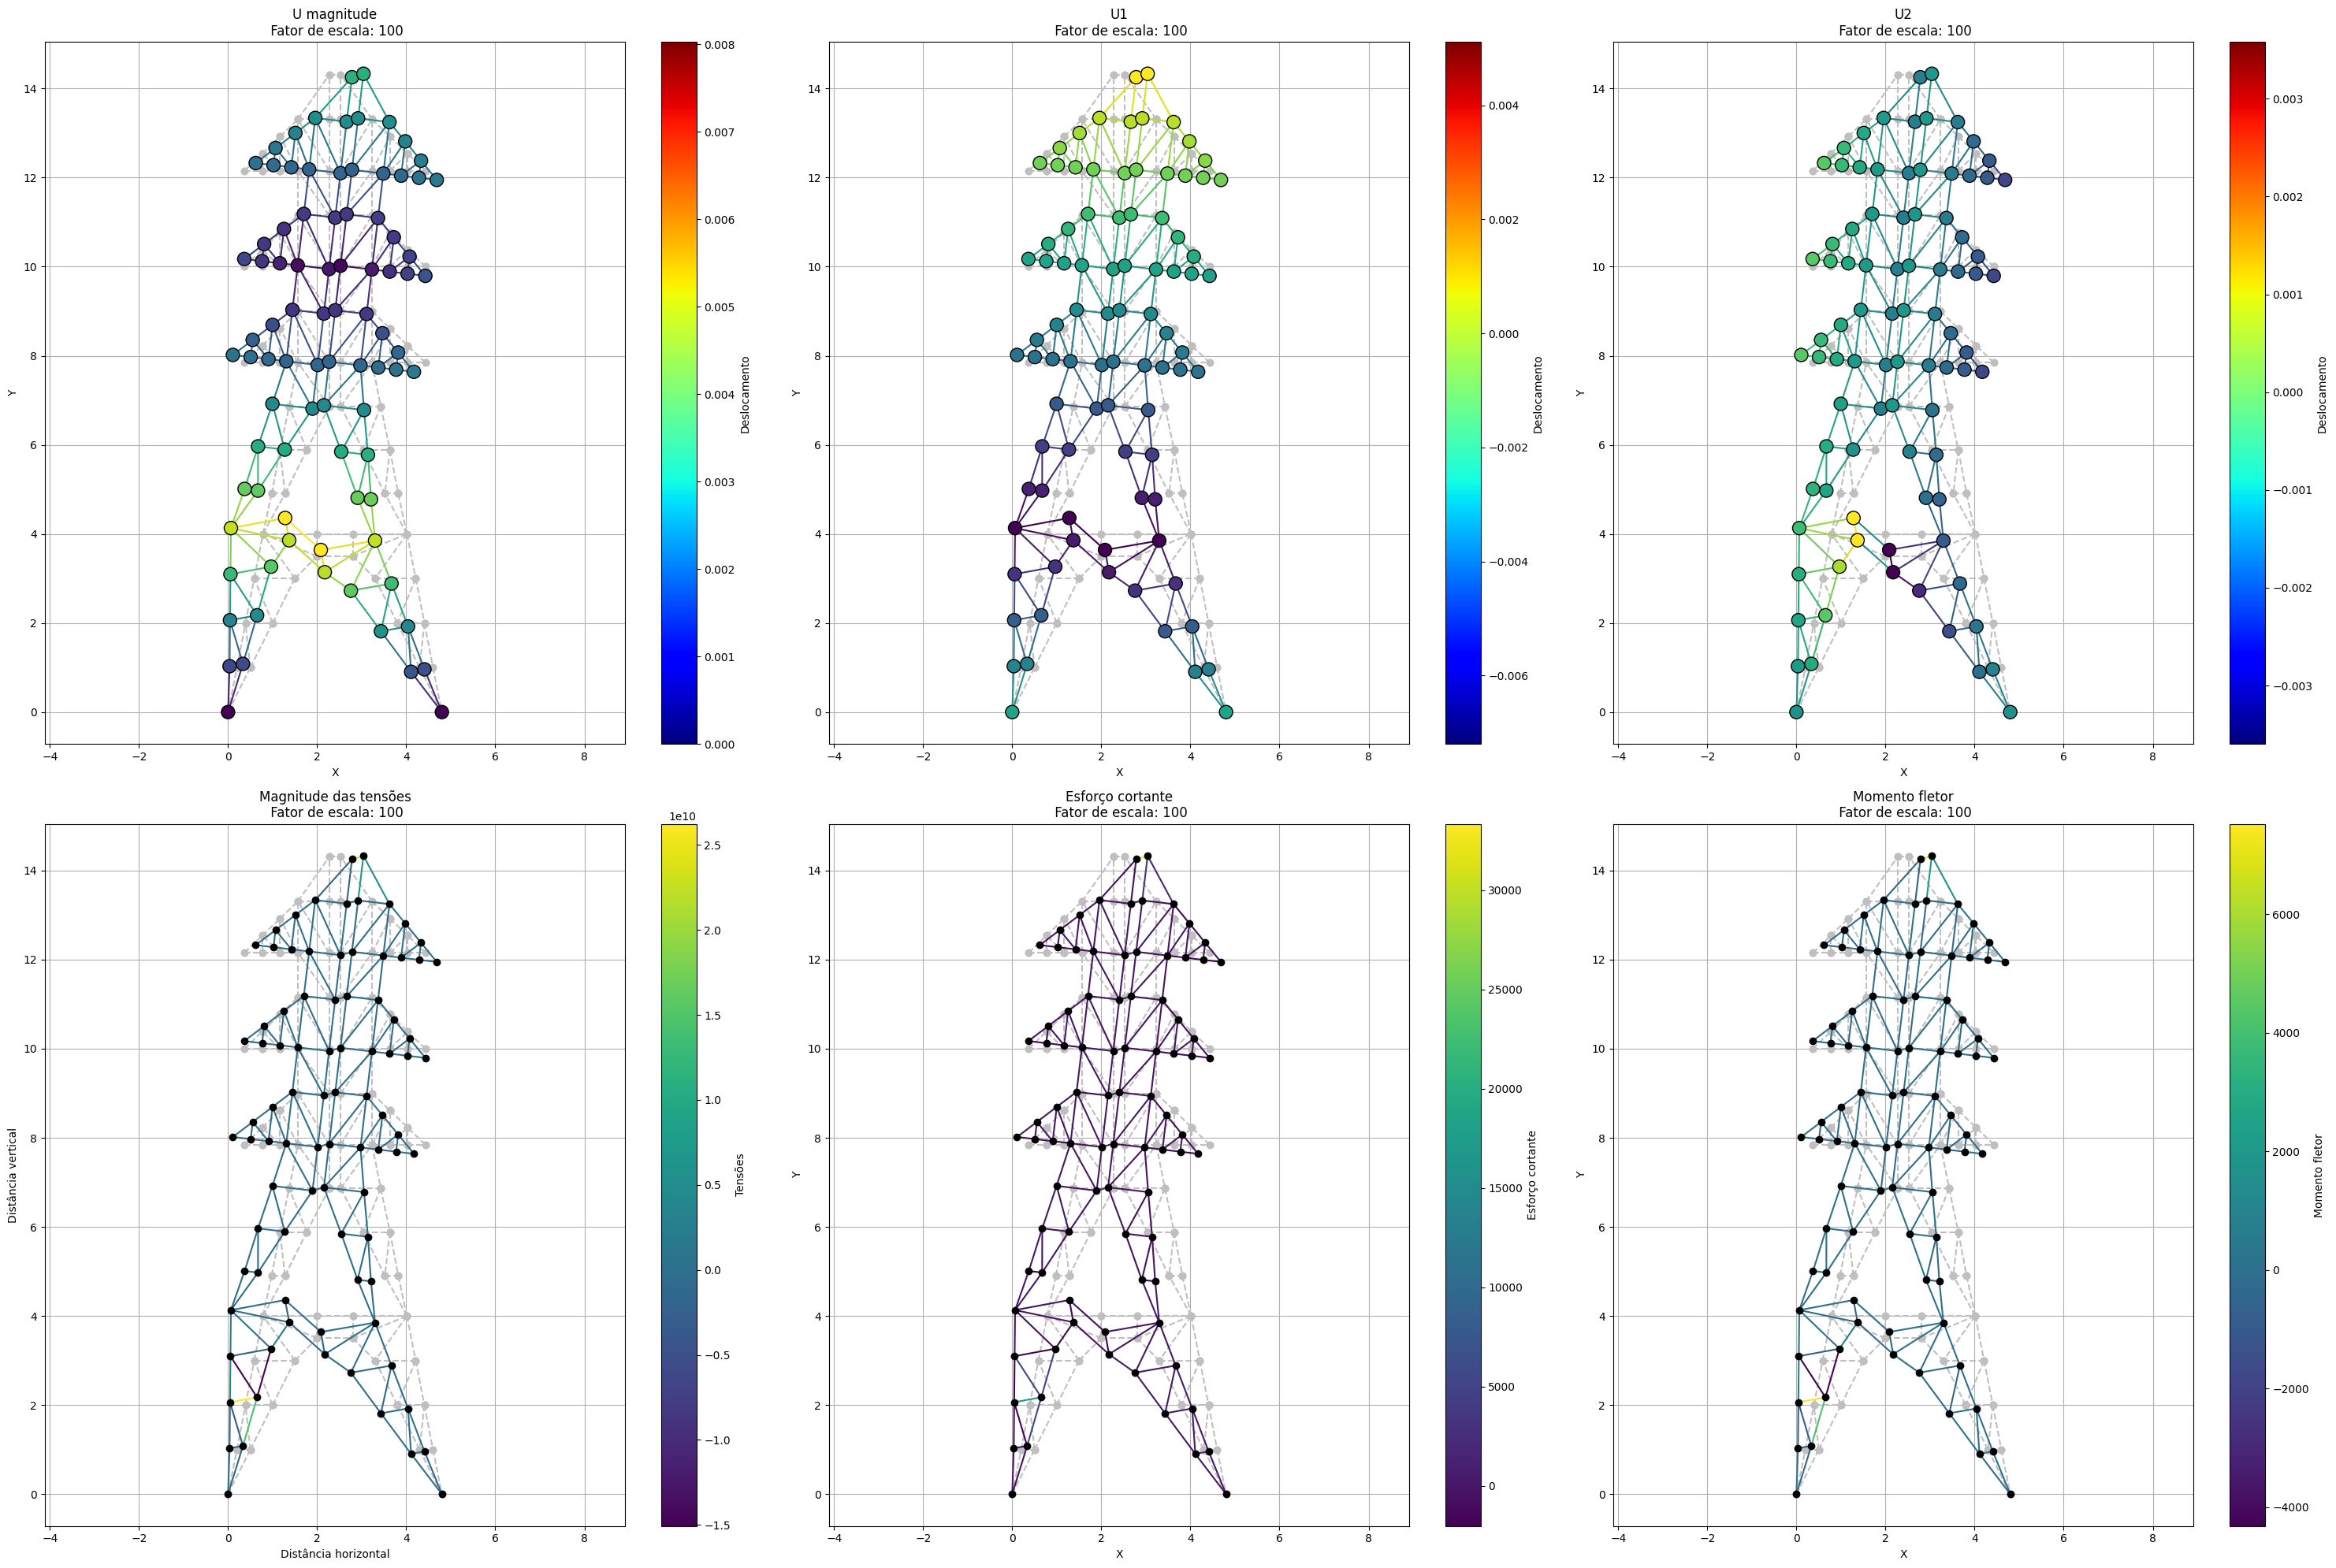

In [151]:
num_cores = len(momento_fletor_maximo)
cores = cm.viridis(np.linspace(0, 1, num_cores))

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 20))

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    ax1.plot([matriz_de_coordenadas[i-1][0], matriz_de_coordenadas[j-1][0]],
             [matriz_de_coordenadas[i-1][1], matriz_de_coordenadas[j-1][1]], '--', c='#C1BEBF', marker='o')

min_deslocamento_global = min(U_global)
max_deslocamento_global = max(U_global)
intervalo_deslocamento_global = max_deslocamento_global - min_deslocamento_global

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    deslocamento_medio = (U_global[i-1] + U_global[j-1]) / 2

    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento_global) / intervalo_deslocamento_global
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    
    ax1.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             color=cores[indice_cor_deslocamento])

norm = plt.Normalize(min(U_global), max(U_global))
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax1, label='Deslocamento')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]

ax1.set_title('U magnitude\n Fator de escala: {}'.format(Fator_de_escala))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.axis('equal')  
ax1.grid()  

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento_global) / intervalo_deslocamento_global * (num_cores - 1))] for d in U_global]


ax1.scatter(x_coords, y_coords, c=cores_pontos, marker='o', edgecolors='black', s = 150, zorder=10)

###############################################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    ax2.plot([matriz_de_coordenadas[i-1][0], matriz_de_coordenadas[j-1][0]],
             [matriz_de_coordenadas[i-1][1], matriz_de_coordenadas[j-1][1]], '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Ux)
    max_deslocamento = max(Ux)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Ux[i-1] + Ux[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax2.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             color=cores[indice_cor_deslocamento], marker='o')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Ux]

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax2, label='Deslocamento')

ax2.scatter(x_coords, y_coords, c=cores_pontos, marker='o', edgecolors='black', s=150, zorder=10)

ax2.set_title('U1\n Fator de escala: {}'.format(Fator_de_escala))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.axis('equal')  
ax2.grid()  

###############################################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    ax3.plot([matriz_de_coordenadas[i-1][0], matriz_de_coordenadas[j-1][0]],
             [matriz_de_coordenadas[i-1][1], matriz_de_coordenadas[j-1][1]], '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Uy)
    max_deslocamento = max(Uy)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Uy[i-1] + Uy[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax3.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             color=cores[indice_cor_deslocamento], marker='o')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Uy]

ax3.scatter(x_coords, y_coords, c=cores_pontos, marker='o', edgecolors='black', s=150, zorder=10)

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax3, label='Deslocamento')  

ax3.set_title('U2\n Fator de escala: {}'.format(Fator_de_escala))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.axis('equal')  
ax3.grid()  

###############################################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    ax4.plot([matriz_de_coordenadas[i-1][0], matriz_de_coordenadas[j-1][0]],
             [matriz_de_coordenadas[i-1][1], matriz_de_coordenadas[j-1][1]], '--', c='#C1BEBF', marker='o')

min_tensao_magnitude = min(tensao_elementos)
max_tensao_magnitude = max(tensao_elementos)
intervalo_magnitude = max_tensao_magnitude - min_tensao_magnitude

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    tensao_magnitude = tensao_elementos[k]
    
    if tensao_magnitude == 0:
        rel_pos_tensao = 0
        indice_cor_tensao = int(num_cores/2)
    else:
        rel_pos_tensao = (tensao_magnitude - min_tensao_magnitude) / intervalo_magnitude
        indice_cor_tensao = int(rel_pos_tensao * (num_cores - 1))
    
    ax4.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             color=cores[indice_cor_tensao])

norm = plt.Normalize(min(tensao_elementos), max(tensao_elementos))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax4, label='Tensões')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]

ax4.set_title('Magnitude das tensões\n Fator de escala: {}'.format(Fator_de_escala))
ax4.set_xlabel('Distância horizontal')
ax4.set_ylabel('Distância vertical')
ax4.axis('equal')  
ax4.grid()  

    
ax4.scatter(x_coords, y_coords, c='black', marker='o', edgecolors='black', zorder=10)


###############################################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    ax5.plot([matriz_de_coordenadas[i-1][0], matriz_de_coordenadas[j-1][0]],
             [matriz_de_coordenadas[i-1][1], matriz_de_coordenadas[j-1][1]], '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    tensao_x = esforco_cortante_maximo[k]

    min_tensao_x = min(esforco_cortante_maximo)
    max_tensao_x = max(esforco_cortante_maximo)
    intervalo_x = max_tensao_x - min_tensao_x
    
    if tensao_x == 0:
        rel_pos_tensao = 0
        indice_cor_tensao = int(num_cores/2)
    else:
        rel_pos_tensao = (tensao_x - min_tensao_x) / intervalo_x
        indice_cor_tensao = int(rel_pos_tensao * (num_cores - 1))
    
    ax5.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             color=cores[indice_cor_tensao])

norm = plt.Normalize(min(esforco_cortante_maximo), max(esforco_cortante_maximo))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax5, label='Esforço cortante')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]

ax5.set_title('Esforço cortante\n Fator de escala: {}'.format(Fator_de_escala))
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.axis('equal')  
ax5.grid()  

ax5.scatter(x_coords, y_coords, color='black', marker='o', zorder=10)

###############################################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    ax6.plot([matriz_de_coordenadas[i-1][0], matriz_de_coordenadas[j-1][0]],
             [matriz_de_coordenadas[i-1][1], matriz_de_coordenadas[j-1][1]], '--', c='#C1BEBF', marker='o')

min_tensao_y = min(momento_fletor_maximo)
max_tensao_y = max(momento_fletor_maximo)
intervalo_tensao_y = max_tensao_y - min_tensao_y

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    tensao_y = momento_fletor_maximo[k]

    rel_pos_tensao = (tensao_y - min_tensao_y) / intervalo_tensao_y
    indice_cor_tensao = int(rel_pos_tensao * (num_cores - 1))

    
    ax6.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             color=cores[indice_cor_tensao])

norm = plt.Normalize(min(momento_fletor_maximo), max(momento_fletor_maximo))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax6, label='Momento fletor')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]

ax6.set_title('Momento fletor\n Fator de escala: {}'.format(Fator_de_escala))
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.axis('equal')  
ax6.grid()  

ax6.scatter(x_coords, y_coords, color='black', marker='o', zorder=10)

plt.tight_layout()

plt.show()


In [152]:
print(f"{"\033[1m\033[91m"}{'Resultados da análise utilizando elementos de pórtico:'}{"\033[0m"}")

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")

for i in range(numero_de_nos):
    print("\nDeslocamento do nó {} na direção X: {}".format(i+1,U[graus_de_liberdade_por_nó*i]))
    print("Deslocamento do nó {} na direção Y: {}".format(i+1,U[graus_de_liberdade_por_nó*i+1]))
    print("\nPosição inicial do nó: X = {}, Y = {}".format(matriz_de_coordenadas[i][0],matriz_de_coordenadas[i][1]))
    print("Posição final do nó: X = {}, Y = {}".format(matriz_de_coordenadas_finais[i][0], matriz_de_coordenadas_finais[i][1]))
    print("\nRotação do nó {} na direção Z: {}".format(i+1,U[graus_de_liberdade_por_nó*i+2]))
    print("\nForça do nó {} na direção X: {}".format(i+1,F[graus_de_liberdade_por_nó*i]))
    print("Força do nó {} na direção Y: {}".format(i+1,F[graus_de_liberdade_por_nó*i+1]))
    print("Momento do nó {} na direção Z: {}".format(i+1,F[graus_de_liberdade_por_nó*i+2]))
    print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")

for j in range(numero_de_elementos):
    print("\nDeformação no elemento {}: {}".format(j+1, elongamento[j]))

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")

for j in range(numero_de_elementos):
    print("\nTensão no elemento {}: {}".format(j+1, tensao_elementos[j]))

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")
    
print('\nA matriz de rigidez do sistema é: \n \n {} \n'.format(matriz_de_rigidez_global_sistema))

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")



Resultados da análise utilizando elementos de pórtico:
________________________________________________________________________________

Deslocamento do nó 1 na direção X: 0
Deslocamento do nó 1 na direção Y: 0

Posição inicial do nó: X = 0, Y = 0
Posição final do nó: X = 0.0, Y = 0.0

Rotação do nó 1 na direção Z: 0

Força do nó 1 na direção X: 45310.88669562712
Força do nó 1 na direção Y: 196098.09808714912
Momento do nó 1 na direção Z: -179.5679326379261
________________________________________________________________________________

Deslocamento do nó 2 na direção X: -0.0016540237291109707
Deslocamento do nó 2 na direção Y: 0.0003033403357740583

Posição inicial do nó: X = 0.2, Y = 1
Posição final do nó: X = 0.19834597627088904, Y = 1.000303340335774

Rotação do nó 2 na direção Z: 0.006385979914806665

Força do nó 2 na direção X: 0.0
Força do nó 2 na direção Y: -3103.937621579942
Momento do nó 2 na direção Z: -1.5880061710049631e-09
________________________________________________

In [153]:
#%reset -f